In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import FactorAnalysis
from scipy import stats
%matplotlib inline

In [2]:
data = pd.read_csv('Graduation_Outcomes_large.csv', sep=',')
data.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [3]:
data = data[~(data['Total Grads - n'].apply(str) == 's')]
data = data[~(data['Total Regents - % of grads'].apply(str) == '.')]

In [4]:
data.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%
5,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2001,64,46,71.900000000000006%,32,50%,69.599999999999994%,...,25,39.1%,54.3%,14,21.9%,30.4%,10,15.6%,6,9.4%


In [5]:
data['Total Grads - % of cohort'] = data['Total Grads - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Total Regents - % of cohort'] = data['Total Regents - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Total Regents - % of grads'] = data['Total Regents - % of grads'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Advanced Regents - % of cohort'] = data['Advanced Regents - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Regents w/o Advanced - % of grads'] = data['Regents w/o Advanced - % of grads'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Local - % of cohort'] = data['Local - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Local - % of grads'] = data['Local - % of grads'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Still Enrolled - % of cohort'] = data['Still Enrolled - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Dropped Out - % of cohort'] = data['Dropped Out - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Regents w/o Advanced - % of cohort'] = data['Regents w/o Advanced - % of cohort'].apply(str).map(lambda x: x.strip('%')).astype('float64')
data['Advanced Regents - % of grads'] = data['Advanced Regents - % of grads'].apply(str).map(lambda x: x.strip('%')).astype('float64')

data['Total Grads - n'] = data['Total Grads - n'].astype('int64')
data['Total Regents - n'] = data['Total Regents - n'].astype('int64')
data['Advanced Regents - n'] = data['Advanced Regents - n'].astype('float64').astype('int64')
data['Dropped Out - n'] = data['Dropped Out - n'].astype('float64').astype('int64')
data['Still Enrolled - n'] = data['Still Enrolled - n'].astype('float64').astype('int64')
data['Regents w/o Advanced - n'] = data['Regents w/o Advanced - n'].astype('float64').astype('int64')
data['Local - n'] = data['Local - n'].astype('int64')

# Firs two features to categorial if it is necessary

In [6]:
data.dropna(inplace=True)

In [7]:
data.dtypes

Demographic                            object
DBN                                    object
School Name                            object
Cohort                                 object
Total Cohort                            int64
Total Grads - n                         int64
Total Grads - % of cohort             float64
Total Regents - n                       int64
Total Regents - % of cohort           float64
Total Regents - % of grads            float64
Advanced Regents - n                    int64
Advanced Regents - % of cohort        float64
Advanced Regents - % of grads         float64
Regents w/o Advanced - n                int64
Regents w/o Advanced - % of cohort    float64
Regents w/o Advanced - % of grads     float64
Local - n                               int64
Local - % of cohort                   float64
Local - % of grads                    float64
Still Enrolled - n                      int64
Still Enrolled - % of cohort          float64
Dropped Out - n                   

In [8]:
number_data = data.drop(['Demographic', 'DBN', 'School Name', 'Cohort'], axis=1)

In [9]:
number_data.head()

,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
1,55,37,67.3,17,30.9,45.9,0,0.0,0.0,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,64,43,67.2,27,42.2,62.8,0,0.0,0.0,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,78,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,78,44,56.4,37,47.4,84.1,0,0.0,0.0,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1
5,64,46,71.9,32,50.0,69.6,7,10.9,15.2,25,39.1,54.3,14,21.9,30.4,10,15.6,6,9.4


In [10]:
normalized_data = StandardScaler().fit_transform(number_data)

In [11]:
# number_data.to_csv('nschool_data.csv', index=False)
# pd.DataFrame(StandardScaler().fit_transform(number_data)).to_csv('normalized_school_data.csv', index=False)

### Calculate principal components using spectral (eigenvalue) decomposition and singular value decomposition.

In [12]:
number_of_features = number_data.columns.size

In [13]:
mean_vec = np.mean(normalized_data, axis=0)
cov_mat = (normalized_data - mean_vec).T.dot((normalized_data - mean_vec)) / (normalized_data.shape[0]-1)
# cov_mat = np.cov(X_std.T)

In [14]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

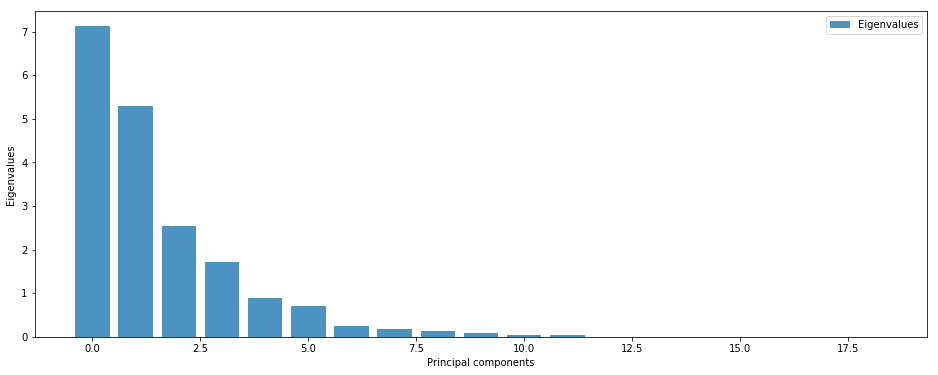

In [15]:
# variance = cov_mat.diagonal()
plt.figure(figsize=(16, 6))
plt.bar(range(number_of_features), eig_vals, alpha=0.8, align='center', label='Eigenvalues')
plt.ylabel('Eigenvalues ')
plt.xlabel('Principal components')
plt.legend(loc='best');
# plt.savefig('file.png')

SVD:

In [16]:
U, s, V = np.linalg.svd(normalized_data)

Score:

In [18]:
matrix_w = np.hstack(eig.reshape(19,1) for eig in eig_vecs)

In [19]:
pd.DataFrame(normalized_data.dot(matrix_w));

In [20]:
n_components = 6
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(normalized_data)
principalDf = pd.DataFrame(data = X_reduced)
# principalDf

# pca.score_samples(normalized_data.T)

# s * s / (number_of_features - 1)

#### Factor analysis

In [21]:
fa = FactorAnalysis(n_components=6)

In [22]:
fa_ft = fa.fit_transform(normalized_data)

D:\Programs\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


In [23]:
# fa.noise_variance_
sorted(fa.score_samples(normalized_data))#[:10]

[-965.70446855691375,
 -777.94041386901358,
 -771.90837524766118,
 -770.48091508324842,
 -467.85990934898729,
 -467.85990934898729,
 -467.85990934898729,
 -456.50486285172894,
 -440.86739498899141,
 -398.20927805972696,
 -334.53502132323814,
 -314.9783639804993,
 -299.03286696676747,
 -217.76323994937519,
 -175.30705787433462,
 -174.52398455605154,
 -174.52398455605154,
 -172.13054555653926,
 -165.27033743088765,
 -165.27033743088765,
 -163.99349663015224,
 -163.56800559326931,
 -163.18333634102706,
 -159.60134201967554,
 -154.55910875395244,
 -153.04421554244203,
 -153.04421554244203,
 -152.23810316935297,
 -151.0382579713856,
 -139.9844122910805,
 -139.50937915658494,
 -137.49263062147085,
 -137.49263062147085,
 -136.82345378105524,
 -136.82345378105524,
 -136.6323451621906,
 -135.96632984321795,
 -131.060107934287,
 -129.07809150887513,
 -127.73316640924045,
 -127.1883927480572,
 -127.1883927480572,
 -126.9608738885843,
 -126.77479679750545,
 -126.52654793428076,
 -125.6536487788405

In [24]:
pd.DataFrame(fa.components_, columns=number_data.columns)

,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,-0.146118,-0.271297,-0.596499,-0.360151,-0.848798,-0.997390,-0.276799,-0.457264,-0.472978,-0.346235,-0.695421,-0.693453,0.188269,0.670848,0.997225,0.093995,0.483687,0.082147,0.429962
1,0.273541,0.354875,0.222269,0.389347,0.256575,0.071587,0.574717,0.855796,0.880558,0.030380,-0.489240,-0.720304,0.058762,-0.128471,-0.071404,0.069955,-0.206303,0.061163,-0.126818
2,0.948890,0.855715,-0.112519,0.765480,-0.092661,-0.009308,0.512484,-0.079791,-0.030099,0.830581,-0.046808,0.016861,0.788107,-0.010520,0.009252,0.806483,0.068921,0.764330,0.152757
3,-0.058166,0.242271,0.309622,0.362701,0.203416,-0.000821,0.456271,0.080886,-0.001444,0.127070,0.194629,0.000387,-0.321404,0.133776,0.000842,-0.493801,-0.238436,-0.511892,-0.283571
4,-0.006335,-0.044471,-0.696763,0.033759,-0.335314,0.000150,0.133268,-0.057961,0.000165,-0.101533,-0.394315,0.000025,-0.315122,-0.549663,0.000150,0.081356,0.628631,0.010595,0.411709
5,-0.000032,0.004220,-0.002414,0.000130,-0.016295,0.000004,-0.008662,-0.026643,-0.000003,0.011065,0.004058,-0.000003,0.017776,0.029538,0.001066,-0.187354,-0.465441,0.248329,0.673833


In [25]:
pd.DataFrame(pca.components_, columns=number_data.columns)

,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,0.202405,0.264293,0.270096,0.287942,0.327371,0.311908,0.253130,0.259964,0.261546,0.237080,0.186723,0.113492,0.051239,-0.187993,-0.311877,0.044925,-0.228660,0.043451,-0.182811
1,0.361878,0.286973,-0.190610,0.234680,-0.195240,-0.160419,0.167011,-0.039180,-0.008583,0.242285,-0.224297,-0.172935,0.346505,0.059981,0.160428,0.366534,0.141383,0.355796,0.180790
2,-0.066050,0.008231,0.039750,0.046627,0.004780,-0.139114,0.254481,0.415548,0.398162,-0.228143,-0.398628,-0.518891,-0.138830,0.060614,0.139192,-0.150537,-0.028362,-0.167251,-0.050049
3,0.016447,0.090652,0.388008,0.032348,0.033476,-0.215846,-0.029649,-0.105158,-0.143466,0.099153,0.147513,-0.112688,0.265235,0.617617,0.215761,-0.128773,-0.380532,-0.074847,-0.223726
4,0.038359,0.164388,-0.088542,0.228868,-0.081207,-0.085765,0.265252,-0.139808,-0.182994,0.108472,0.027101,0.069830,-0.154004,0.008069,0.085006,-0.000639,0.484300,-0.414981,-0.564625
5,-0.004570,0.188509,-0.105147,0.296250,-0.083588,-0.070200,0.386218,-0.170623,-0.190104,0.086885,0.053928,0.093821,-0.302167,-0.015382,0.071061,-0.415306,-0.235886,-0.141140,0.524786


In [26]:
pd.DataFrame(V[0:6]).T

,0,1,2,3,4,5
0,0.202405,-0.361878,-0.066050,0.016447,-0.038359,-0.004570
1,0.264293,-0.286973,0.008231,0.090652,-0.164388,0.188509
2,0.270096,0.190610,0.039750,0.388008,0.088542,-0.105147
3,0.287942,-0.234680,0.046627,0.032348,-0.228868,0.296250
4,0.327371,0.195240,0.004780,0.033476,0.081207,-0.083588
5,0.311908,0.160419,-0.139114,-0.215846,0.085765,-0.070200
6,0.253130,-0.167011,0.254481,-0.029649,-0.265252,0.386218
7,0.259964,0.039180,0.415548,-0.105158,0.139808,-0.170623
8,0.261546,0.008583,0.398162,-0.143466,0.182994,-0.190104
9,0.237080,-0.242285,-0.228143,0.099153,-0.108472,0.086885


In [27]:
pd.DataFrame(eig_vecs[:,0:6])

,0,1,2,3,4,5
0,0.202405,-0.361878,0.066050,0.016447,0.038359,-0.004570
1,0.264293,-0.286973,-0.008231,0.090652,0.164388,0.188509
2,0.270096,0.190610,-0.039750,0.388008,-0.088542,-0.105147
3,0.287942,-0.234680,-0.046627,0.032348,0.228868,0.296250
4,0.327371,0.195240,-0.004780,0.033476,-0.081207,-0.083588
5,0.311908,0.160419,0.139114,-0.215846,-0.085765,-0.070200
6,0.253130,-0.167011,-0.254481,-0.029649,0.265252,0.386218
7,0.259964,0.039180,-0.415548,-0.105158,-0.139808,-0.170623
8,0.261546,0.008583,-0.398162,-0.143466,-0.182994,-0.190104
9,0.237080,-0.242285,0.228143,0.099153,0.108472,0.086885


In [28]:
i = 0
for col in number_data.columns:
    print(i, col)
    i+=1

0 Total Cohort
1 Total Grads - n
2 Total Grads - % of cohort
3 Total Regents - n
4 Total Regents - % of cohort
5 Total Regents - % of grads
6 Advanced Regents - n
7 Advanced Regents - % of cohort
8 Advanced Regents - % of grads
9 Regents w/o Advanced - n
10 Regents w/o Advanced - % of cohort
11 Regents w/o Advanced - % of grads
12 Local - n
13 Local - % of cohort
14 Local - % of grads
15 Still Enrolled - n
16 Still Enrolled - % of cohort
17 Dropped Out - n
18 Dropped Out - % of cohort


In [30]:
pd.DataFrame(data=fa.noise_variance_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.00001,0.007523,0.000774,0.000049,0.051047,4.579715e-07,0.104424,0.041545,0.000001,0.162756,0.081461,0.000001,0.137071,0.212449,0.000357,0.050297,0.050071,0.081497,0.071748


In [35]:
pd.DataFrame(pca.fit_transform(normalized_data))

,0,1,2,3,4,5
0,-1.570388,-0.697286,0.000168,1.482484,0.669451,-0.171816
1,-0.589961,-1.157336,-0.875014,0.782139,-0.286356,0.566619
2,0.154792,-1.495658,-1.758251,-0.792617,-0.090948,0.582981
3,0.232036,-1.545775,-1.790799,-0.734872,-0.130273,0.608489
4,0.116508,-1.379165,-0.111588,0.530784,-0.208817,0.029767
5,-0.788624,-0.872805,1.174301,0.475322,0.601851,-0.786026
6,-0.226919,-0.668643,0.427764,1.448935,-0.609207,0.135428
7,-1.055604,0.015522,0.253569,1.460874,0.728442,-0.665784
8,-1.146221,0.137153,-0.193428,0.228631,0.538070,-0.351334
9,-0.338493,-0.215487,-0.701472,-1.600456,0.028629,-0.016139


In [36]:
pd.DataFrame(fa.fit_transform(normalized_data))

D:\Programs\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


,0,1,2,3,4,5
0,0.626216,-0.474410,-0.279266,0.542586,-0.837259,-0.641970
1,-0.030007,-0.825626,-0.233086,0.390031,-0.466470,0.645811
2,-0.841405,-1.259922,-0.165142,0.032072,0.655052,0.527431
3,-0.856965,-1.268199,-0.164180,0.054392,0.595531,0.576156
4,-0.231620,-0.144759,-0.477986,0.101852,-0.452559,0.184481
5,0.271116,0.588831,-0.692410,-0.089121,-0.181106,-1.004864
6,0.213640,0.159421,-0.359880,0.199260,-1.022516,0.588833
7,0.574900,-0.077287,-0.090967,0.153811,-0.853876,-0.989679
8,0.308001,-0.307951,-0.023305,-0.114589,0.031171,-0.626632
9,-0.608146,-0.347084,-0.159070,-0.629483,1.221364,-0.044416


In [ ]:
-1.570388	-0.697286	0.000168	1.482484	0.669451	-0.171816

0.626216	-0.474410	-0.279266	0.542586	-0.837259	-0.641970

In [63]:
fa.loglike_

[-385383.38903018058,
 -267174.43650572764,
 -190203.46536325838,
 -146012.21823431915,
 -123250.65921099209,
 -109989.79840224916,
 -99527.884129393875,
 -89485.720252629952,
 -79501.207631917787,
 -70112.597453802475,
 -61969.391871190084,
 -55410.724423208769,
 -50288.831329226312,
 -46165.405497994754,
 -42594.878292795984,
 -39231.116335887484,
 -35898.35954862483,
 -32573.945645865948,
 -29284.427576865637,
 -26058.202892836318,
 -22926.913794428729,
 -19930.591097534882,
 -17119.987867083339,
 -14555.800169160275,
 -12302.986155685909,
 -10418.764695653439,
 -8935.9519250127378,
 -7848.4991215610926,
 -7108.7890036545168,
 -6640.7791232894861,
 -6362.0288170936137,
 -6202.2083694079683,
 -6111.0106425336198,
 -6056.9395323423742,
 -6022.1393285559589,
 -5997.1850339862558,
 -5977.3382448935763,
 -5960.2862333453022,
 -5944.9129034646949,
 -5930.6748345201931,
 -5917.2980277754841,
 -5904.6341795688513,
 -5892.5945423419635,
 -5881.1186309051827,
 -5870.1616251518717,
 -5859.6856